Important Libraries Import

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("whitegrid")

Reading the data from csv file and printing the head

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Removing NaN values from data

In [6]:
df.isnull().sum().sum()
df=df.dropna()
df.isnull().sum().sum()

0

Declaring the labels of data

In [7]:
LABELS = ["Normal", "Fraud"]

Generating a bar chart of the class count

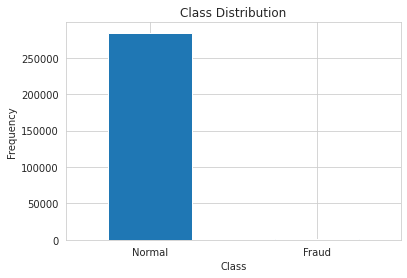

In [8]:
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Printing the totall amount of samples against each class

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Printing the shape of both the classes

In [10]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


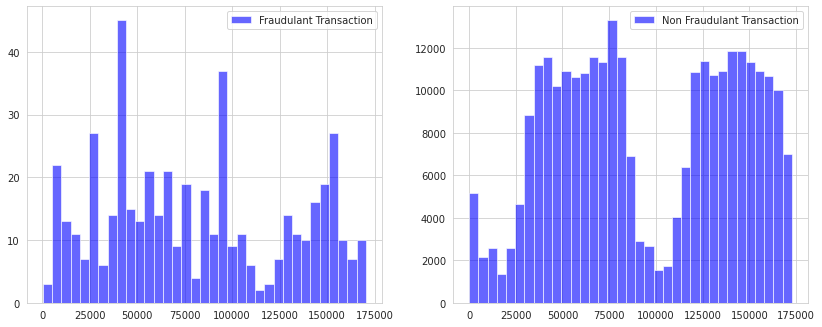

In [12]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

heatmap to find any high correlations

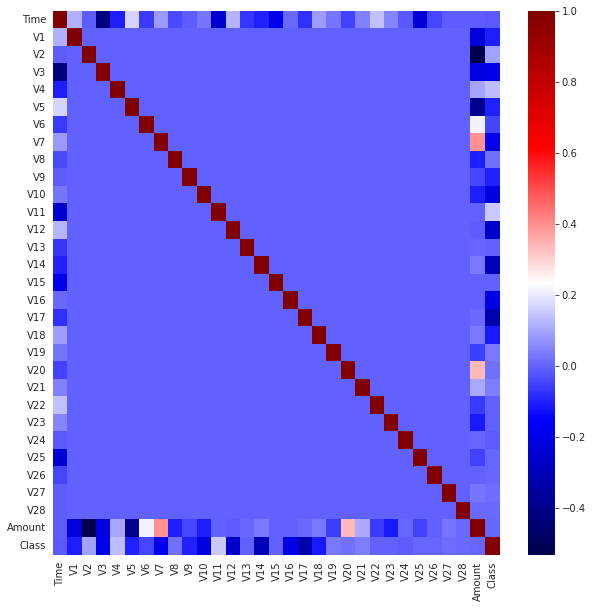

In [13]:

plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show();

Distribution of data into training and testing and tghen scalar transformation

In [14]:
scalar = StandardScaler()

X = df.drop('Class', axis=1)
y = df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [15]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


Function to priny Accuracy, classificationn report f1 score recall precision

In [16]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

Model Compilation

In [17]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

Model Compilation

In [18]:
myMetrics = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=myMetrics)

Model Training

In [19]:
callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=100, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/100
78/78 [==============================] - 9s 82ms/step - loss: 0.8168 - fn: 60.0000 - fp: 73451.0000 - tn: 85753.0000 - tp: 227.0000 - precision: 0.0031 - recall: 0.7909 - val_loss: 0.5659 - val_fn: 13.0000 - val_fp: 261.0000 - val_tn: 39543.0000 - val_tp: 56.0000 - val_precision: 0.1767 - val_recall: 0.8116
Epoch 2/100
78/78 [==============================] - 6s 73ms/step - loss: 0.6924 - fn: 43.0000 - fp: 61015.0000 - tn: 98189.0000 - tp: 244.0000 - precision: 0.0040 - recall: 0.8502 - val_loss: 0.5269 - val_fn: 13.0000 - val_fp: 238.0000 - val_tn: 39566.0000 - val_tp: 56.0000 - val_precision: 0.1905 - val_recall: 0.8116
Epoch 3/100
78/78 [==============================] - 6s 73ms/step - loss: 0.6140 - fn: 46.0000 - fp: 48590.0000 - tn: 110614.0000 - tp: 241.0000 - precision: 0.0049 - recall: 0.8397 - val_loss: 0.4841 - val_fn: 13.0000 - val_fp: 116.0000 - val_tn: 39688.0000 - val_tp: 56.0000 - val_precision: 0.3256 - val_recall: 0.8116
Epoch 4/100
78/78 [=================

Model Evaluation

In [20]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0031 - fn: 28.0000 - fp: 15.0000 - tn: 85292.0000 - tp: 108.0000 - precision: 0.8780 - recall: 0.7941
[0.0031273753847926855, 28.0, 15.0, 85292.0, 108.0, 0.8780487775802612, 0.7941176295280457]


Loss, Accuracdy, Precision and recall graphs

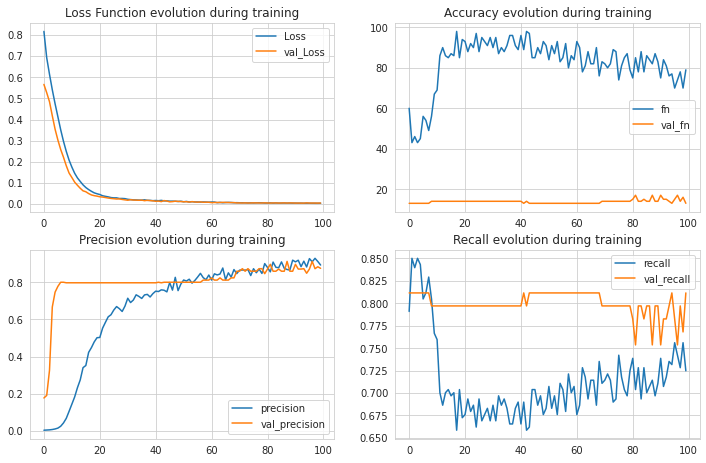

In [21]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

ANN (Artificial Neural Network Testing)

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999623    0.941909  0.999536       0.970766       0.999519
recall          0.999912    0.790941  0.999536       0.895426       0.999536
f1-score        0.999768    0.859848  0.999536       0.929808       0.999516
support    159204.000000  287.000000  0.999536  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159190     14]
 [    60    227]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999672    0.878049  0.999497      0.938860      0.999478
recall         0.999824    0.794118  0.999497      0.896971      0.999497
f1-score       0.999748    0.833977  0.999497      0.916862      0.999484


Random Forest Training and testing 

In [23]:

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999719    0.933333  0.999625      0.966526      0.999613
recall         0.999906    0.823529  0.999625      0.911718      0.999625
f1-score       0.999812    0.875000  0.999625      0.937406      0.999614
support    85307.000000  136.000000  0.999625  85443.000000  85443.000000


Logistic Regression Training and Testing

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LogisticRegression'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999322    0.890547  0.999185       0.944935       0.999126
recall          0.999862    0.623693  0.999185       0.811778       0.999185
f1-score        0.999592    0.733607  0.999185       0.866599       0.999113
support    159204.000000  287.000000  0.999185  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159182     22]
 [   108    179]]

Test Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999426    0.870000  0.999274      0.934713      0.999220
recall         0.999848    0.639706  0.999274      0.819777      0.999274
f1-score       0.999637    0.737288  0.999274      0.868462      0.999219


In [26]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999711    0.983673  0.999687       0.991692       0.999682
recall          0.999975    0.839721  0.999687       0.919848       0.999687
f1-score        0.999843    0.906015  0.999687       0.952929       0.999674
support    159204.000000  287.000000  0.999687  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159200      4]
 [    46    241]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.932773  0.999614      0.966240      0.999600
recall         0.999906    0.816176  0.999614      0.908041      0.999614
f1-score       0.999807    0.870588  0.999614      0.935197      0.999601


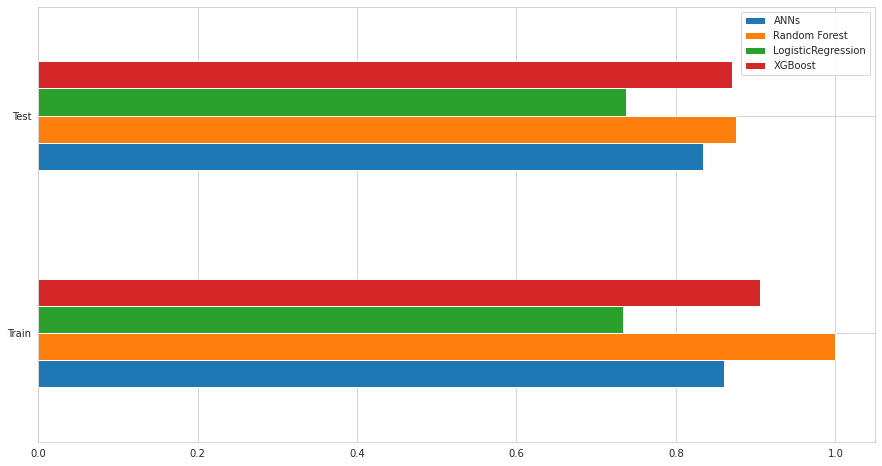

In [27]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))